In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [2]:
accs = []

In [3]:
data_train = pd.read_csv('../Created Dataset/var_skew_dataset.csv')

In [4]:
data_train .head()

,Mean,std,Variance,Skewness,Entropy,RMS,Kurtios,HMI1,HMI2,HMI3,...,homogeneity4,energy1,energy2,energy3,energy4,correlation1,correlation2,correlation3,correlation4,Class
0,55.212544,46.056565,2121.207208,0.370450,5.375762,9.302612,-0.628678,2.752905,8.030957,11.070417,...,0.513325,0.177499,0.172328,0.180325,0.171641,0.969317,0.959636,0.974818,0.958198,0
1,76.037273,79.565990,6330.746828,0.585233,5.781641,7.635726,-0.877843,2.904895,7.803627,12.448359,...,0.432991,0.230150,0.221221,0.232777,0.221043,0.969677,0.958555,0.973180,0.957760,0
2,53.652053,59.587603,3550.682395,1.574931,4.946379,10.302398,2.218936,2.779911,7.267831,10.447366,...,0.490227,0.232071,0.220649,0.233649,0.221646,0.949499,0.932350,0.958399,0.931763,0
3,49.231160,42.645217,1818.614523,0.483434,6.123446,10.533521,-1.392569,2.778616,7.928608,10.892414,...,0.450451,0.374133,0.365637,0.379210,0.367641,0.913667,0.891387,0.927097,0.891294,0
4,77.261385,83.705507,7006.611845,0.747321,6.017668,7.935202,-0.774676,2.996775,7.602490,11.633094,...,0.444437,0.312793,0.304938,0.317934,0.302303,0.923784,0.898480,0.934894,0.898350,0


In [5]:
data_test = pd.read_csv('../Created Dataset/testing_dataset.csv')

In [6]:
data_test.head()

,Mean,std,Variance,Skewness,Entropy,RMS,Kurtios,HMI1,HMI2,HMI3,...,homogeneity4,energy1,energy2,energy3,energy4,correlation1,correlation2,correlation3,correlation4,Class
0,56.681144,79.743492,6359.024498,1.291628,4.222218,6.189814,0.554260,2.838741,7.015589,11.773509,...,0.444178,0.264679,0.255574,0.271262,0.256515,0.950466,0.938164,0.961990,0.937776,0
1,57.081780,47.936449,2297.903123,0.680044,6.105423,9.747268,-0.904191,2.842497,7.755364,11.051098,...,0.472436,0.397531,0.392872,0.402578,0.392745,0.881808,0.857369,0.907018,0.860329,0
2,29.245408,38.499349,1482.199897,0.751134,3.975813,7.177204,-1.231857,2.697422,7.582266,10.132647,...,0.244510,0.064213,0.060488,0.066614,0.060517,0.924454,0.899439,0.945721,0.898244,0
3,50.539923,57.317611,3285.308586,1.992440,6.159680,11.159507,3.412302,2.619346,7.517582,11.172308,...,0.501064,0.304583,0.295839,0.310390,0.295836,0.903205,0.877960,0.921479,0.879440,0
4,29.926339,52.966868,2805.489070,2.501142,4.874646,7.413451,5.950644,2.483199,7.457868,9.281168,...,0.512756,0.404275,0.381825,0.421123,0.409811,0.900932,0.856400,0.937271,0.912609,0


In [7]:
import warnings
warnings.filterwarnings("ignore")

In [8]:
# df = df.dropna()

missing_data = ['Area', 'Perimeter', 'Circle', 'Convex Area', 'Solidity', 'Equivalent Diameter', 'Major Axis', 'Minor Axis']
for i in missing_data:
    fill_list = data_train[i].dropna().tolist()
    data_train [i] = data_train[i].fillna(pd.Series(np.random.choice(fill_list , size = len(data_train.index))))
# data_train.isnull().sum()

In [9]:
# df = df.dropna()

missing_data = ['Area', 'Perimeter', 'Circle', 'Convex Area', 'Solidity', 'Equivalent Diameter', 'Major Axis', 'Minor Axis']
for i in missing_data:
    fill_list = data_test[i].dropna().tolist()
    data_test[i] = data_test[i].fillna(pd.Series(np.random.choice(fill_list , size = len(data_test.index))))
# data_test.isnull().sum()

In [10]:
X = data_train.drop(columns=["Class"])
y = data_train["Class"]
Xt = data_test.drop(columns=["Class"])
yt = data_test["Class"]

In [11]:
# import random
# Xt = random.shuffle(Xt)

## feature selection

In [12]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Initialize the feature selector
k_best = SelectKBest(score_func=mutual_info_classif, k=25)  # Select the top 2 features based on mutual information

feature_names = ['Mean', 'std', 'Variance','Skewness','Entropy', 'RMS', 'Kurtios', 'HMI1', 'HMI2', 'HMI3',
       'HMI4', 'Area', 'Perimeter', 'Circle', 'Convex Area', 'Solidity',
       'Equivalent Diameter', 'Major Axis', 'Minor Axis', 'contrast1',
       'contrast2', 'contrast3', 'contrast4', 'dissimilarity1',
       'dissimilarity2', 'dissimilarity3', 'dissimilarity4', 'homogeneity1',
       'homogeneity2', 'homogeneity3', 'homogeneity4', 'energy1', 'energy2',
       'energy3', 'energy4', 'correlation1', 'correlation2', 'correlation3',
       'correlation4']

# Apply feature selection to the data
X_selected = k_best.fit_transform(X, y)

# Get the selected feature indices and scores
selected_indices = k_best.get_support(indices=True)
selected_scores = k_best.scores_

# Sort the features based on scores in ascending order
sorted_features = sorted(zip(selected_indices, selected_scores), key=lambda x: x[1], reverse=True)
X_select = pd.DataFrame()
# Print the top 20 features in ascending order
ll=[]
for idx, score in sorted_features[:25]:
    ll.append(feature_names[idx])
#     print(f"Feature {feature_names[idx]}: Score {score}")

## select best features only

In [13]:
X_select = X[ll]
Xt_select = Xt[ll]

# models with whole dataset

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

## RF

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
# Fit the parameters before oversampling:
rf_clf.fit(X_train, y_train)
# print(f"Train Acc of Random Forest : {rf_clf.score(X_train,y_train)}")
# print(f"Validation Acc of Random Forest : {rf_clf.score(X_val,y_val)}")
# print(f"Test Acc of Random Forest : {rf_clf.score(Xt,yt) }")
accs.append([rf_clf.score(X_train,y_train),rf_clf.score(X_val,y_val),rf_clf.score(Xt,yt)])

## SVM

In [16]:
from sklearn.svm import SVC
clf1 = SVC(kernel='rbf')
clf1.fit(X_train, y_train)
# print(f"Train Acc of SVM : {clf1.score(X_train,y_train)}")
# print(f"Validation Acc of SVM : {clf1.score(X_val,y_val)}")
# print(f"Test Acc of SVM : {clf1.score(Xt,yt) }")
accs.append([clf1.score(X_train,y_train),clf1.score(X_val,y_val),clf1.score(Xt,yt)])

## KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# create KNeighborsClassifier with 7 neighbors 
knn = KNeighborsClassifier(n_neighbors=10)
# Fit the data to knn model
knn.fit(X_train,y_train)
# print(f"Train acc of KNN: {knn.score(X_train,y_train)}")
# print(f"Validation Acc of KNN : {knn.score(X_val,y_val)}")
# print(f"Test Acc of KNN : {knn.score(Xt,yt) }")
accs.append([knn.score(X_train,y_train),knn.score(X_val,y_val),knn.score(Xt,yt)])

## XGBoost

In [18]:
## make xgboost classifier
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
# print(f"Train acc of XGBoost: {xgb.score(X_train,y_train)}")
# print(f"Validation Acc of XGBoost : {xgb.score(X_val,y_val)}")
# print(f"Test Acc of XGBoost : {xgb.score(Xt,yt) }")
accs.append([xgb.score(X_train,y_train),xgb.score(X_val,y_val),xgb.score(Xt,yt)])

## PCA and StandardScaler

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca_m = PCA(n_components=39)

new_X = pca_m.fit_transform(X)
# scaler = StandardScaler()
# new_X = scaler.fit_transform(new_X)

new_Xt = pca_m.fit_transform(Xt)
# scaler = StandardScaler()
# new_Xt = scaler.fit_transform(new_Xt)

## split data after pca and scaler

In [20]:
X_trainn,X_valn,y_trainn,y_valn = train_test_split(new_X,y,test_size=0.2,random_state=42,shuffle=True)

## RF PCA

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_clf2 = RandomForestClassifier()
# Fit the parameters before oversampling:
rf_clf2.fit(X_trainn, y_trainn)
# print(f"Train Acc of Random Forest PCA : {rf_clf2.score(X_trainn,y_trainn)}")
# print(f"Validation Acc of Random Forest PCA  : {rf_clf2.score(X_valn,y_valn)}")
# print(f"Test Acc of Random Forest PCA  : {rf_clf2.score(new_Xt,yt) }")
accs.append([rf_clf2.score(X_trainn,y_trainn),rf_clf2.score(X_valn,y_valn),rf_clf2.score(new_Xt,yt)])

## SVM PCA

In [22]:
from sklearn.svm import SVC
clf2 = SVC(kernel='rbf')
clf2.fit(X_trainn, y_trainn)

# print(f"Train Acc of SVM PCA : {clf2.score(X_trainn,y_trainn)}")
# print(f"Validation Acc of SVM PCA  : {clf2.score(X_valn,y_valn)}")
# print(f"Test Acc of SVM PCA  : {clf2.score(new_Xt,yt) }")
accs.append([clf2.score(X_trainn,y_trainn),clf2.score(X_valn,y_valn),clf2.score(new_Xt,yt)])

## KNN PCA

In [23]:
knn2 = KNeighborsClassifier(n_neighbors=10)
# Fit the data to knn model
knn2.fit(X_trainn,y_trainn)
# print(f"Train acc of KNN PCA : {knn2.score(X_trainn,y_trainn)}")
# print(f"Validation Acc of KNN PCA  : {knn2.score(X_valn,y_valn)}")
# print(f"Test Acc of KNN PCA  : {knn2.score(new_Xt,yt) }")
accs.append([knn2.score(X_trainn,y_trainn),knn2.score(X_valn,y_valn),knn2.score(new_Xt,yt)])

## XGBoost PCA

In [24]:
## make xgboost classifier

xgb2 = XGBClassifier()
xgb2.fit(X_trainn,y_trainn)
# print(f"Train acc of XGBoost PCA : {xgb2.score(X_trainn,y_trainn)}")
# print(f"Validation Acc of XGBoost PCA  : {xgb2.score(X_valn,y_valn)}")
# print(f"Test Acc of XGBoost PCA  : {xgb2.score(new_Xt,yt) }")
accs.append([xgb2.score(X_trainn,y_trainn),xgb2.score(X_valn,y_valn),xgb2.score(new_Xt,yt)])

# selected features

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X_select,y,test_size=0.2,random_state=42,shuffle=True)

## RF Selected

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
# Fit the parameters before oversampling:
rf_clf.fit(X_train, y_train)
# print(f"Train Acc of Random Forest : {rf_clf.score(X_train,y_train)}")
# # rf_clf.score(X_test,y_test)
# print(f"Validation Acc of Random Forest PCA  : {rf_clf.score(X_val,y_val)}")
# print(f"Test Acc of Random Forest PCA  : {rf_clf.score(Xt_select,yt) }")
accs.append([rf_clf.score(X_train,y_train),rf_clf.score(X_val,y_val),rf_clf.score(Xt_select,yt)])

## SVM Selected

In [27]:
from sklearn.svm import SVC
clf1 = SVC(kernel='rbf')
clf1.fit(X_train, y_train)
# print(f"Train Acc of SVM : {clf1.score(X_train,y_train)}")
# print(f"Validation Acc of SVM  : {clf1.score(X_val,y_val)}")
# print(f"Test Acc of SVM  : {clf1.score(Xt_select,yt) }")
accs.append([clf1.score(X_train,y_train),clf1.score(X_val,y_val),clf1.score(Xt_select,yt)])

## KNN Selected

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# create KNeighborsClassifier with 7 neighbors 
knn = KNeighborsClassifier(n_neighbors=10)
# Fit the data to knn model
knn.fit(X_train,y_train)
# print(f"Train acc of KNN: {knn.score(X_train,y_train)}")
# print(f"Validation Acc of KNN  : {knn.score(X_val,y_val)}")
# print(f"Test Acc of KNN  : {knn.score(Xt_select,yt) }")
accs.append([knn.score(X_train,y_train),knn.score(X_val,y_val),knn.score(Xt_select,yt)])

## XGBoost Selected

In [29]:
## make xgboost classifier

xgb = XGBClassifier()
xgb.fit(X_train,y_train)
# print(f"Train acc of XGBoost : {xgb.score(X_train,y_train)}")
# print(f"Validation Acc of XGBoost  : {xgb.score(X_val,y_val)}")
# print(f"Test Acc of XGBoost  : {xgb.score(Xt_select,yt) }")
accs.append([xgb.score(X_train,y_train),xgb.score(X_val,y_val),xgb.score(Xt_select,yt)])

## With PCA and StandardScaler

In [30]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca_m = PCA(n_components=25)

new_X = pca_m.fit_transform(X_select)
scaler = StandardScaler()
new_X = scaler.fit_transform(X)

new_Xt = pca_m.fit_transform(Xt_select)
scaler = StandardScaler()
new_Xt = scaler.fit_transform(Xt)

## Split Selected

In [31]:
X_trainn,X_valn,y_trainn,y_valn = train_test_split(new_X,y,test_size=0.2,random_state=42,shuffle=True)

## RF Selected PCA

In [32]:
from sklearn.ensemble import RandomForestClassifier
rf_clf2 = RandomForestClassifier()
# Fit the parameters before oversampling:
rf_clf2.fit(X_trainn, y_trainn)
# print(f"Train Acc of Random Forest PCA : {rf_clf2.score(X_trainn,y_trainn)}")
# print(f"Validation Acc of Random Forest PCA : {rf_clf2.score(X_valn,y_valn)}")
# print(f"Test Acc of Random Forest PCA  : {rf_clf2.score(new_Xt,yt) }")
accs.append([rf_clf2.score(X_trainn,y_trainn),rf_clf2.score(X_valn,y_valn),rf_clf2.score(new_Xt,yt)])

## SVM Selected PCA

In [33]:
from sklearn.svm import SVC
clf2 = SVC(kernel='rbf')
clf2.fit(X_trainn, y_trainn)

# print(f"Train Acc of SVM PCA : {clf2.score(X_trainn,y_trainn)}")
# print(f"Validation Acc of SVM PCA : {clf2.score(X_valn,y_valn)}")
# print(f"Test Acc of SVM PCA  : {clf2.score(new_Xt,yt) }")
accs.append([clf2.score(X_trainn,y_trainn),clf2.score(X_valn,y_valn),clf2.score(new_Xt,yt)])

## KNN Selected PCA

In [34]:
knn2 = KNeighborsClassifier(n_neighbors=10)
# Fit the data to knn model
knn2.fit(X_trainn,y_trainn)
# print(f"Train acc of KNN PCA : {knn2.score(X_trainn,y_trainn)}")
# print(f"Validation Acc of KNN PCA : {knn2.score(X_valn,y_valn)}")
# print(f"Test Acc of KNN PCA  : {knn2.score(new_Xt,yt) }")
accs.append([knn2.score(X_trainn,y_trainn),knn2.score(X_valn,y_valn),knn2.score(new_Xt,yt)])

## XGBoost Selected PCA

In [35]:
## make xgboost classifier
xgb2 = XGBClassifier()
xgb2.fit(X_trainn,y_trainn)
# print(f"Train acc of XGBoost PCA : {xgb2.score(X_trainn,y_trainn)}")
# print(f"Validation Acc of XGBoost PCA : {xgb2.score(X_valn,y_valn)}")
# print(f"Test Acc of XGBoost PCA  : {xgb2.score(new_Xt,yt) }")
accs.append([xgb2.score(X_trainn,y_trainn),xgb2.score(X_valn,y_valn),xgb2.score(new_Xt,yt)])

In [36]:
print("        train|valid|test")
## make float 2 digits only
accs = np.array(accs)
accs = np.around(accs,decimals=2)
print(f"  RF      |{accs[0][0]}  | {accs[0][1]}| {accs[0][2]}")
print(f"  SVM     |{accs[1][0]}  | {accs[1][1]}| {accs[1][2]}")
print(f"  KNN     |{accs[2][0]}  | {accs[2][1]}| {accs[2][2]}")
print(f" Xgbost   |{accs[3][0]}  | {accs[3][1]}| {accs[3][2]}")
print(f"RF PCA    |{accs[4][0]}  | {accs[4][1]}| {accs[4][2]}")
print(f"SVM PCA   |{accs[5][0]}  | {accs[5][1]}| {accs[5][2]}")
print(f"KNN PCA   |{accs[6][0]}  | {accs[6][1]}| {accs[6][2]}")
print(f"Xgbost PCA|{accs[7][0]}  | {accs[7][1]}| {accs[7][2]}")
print("================after feature selection================")
print(f"  RF     |{accs[8][0]}  | {accs[8][1]}| {accs[8][2]}")
print(f"  SVM    |{accs[9][0]}  | {accs[9][1]}| {accs[9][2]}")
print(f"  KNN    |{accs[10][0]}  | {accs[10][1]}| {accs[10][2]}")
print(f" Xgbost  |{accs[11][0]}  | {accs[11][1]}| {accs[11][2]}")
print(f"RF PCA   |{accs[12][0]}  | {accs[12][1]}| {accs[12][2]}")
print(f"SVM PCA  |{accs[13][0]}  | {accs[13][1]}| {accs[13][2]}")
print(f"KNN PCA  |{accs[14][0]}  | {accs[14][1]}| {accs[14][2]}")
print(f"Xgbost PCA|{accs[15][0]}  | {accs[15][1]}| {accs[15][2]}")

        train|valid|test
  RF      |1.0  | 0.89| 0.89
  SVM     |0.52  | 0.52| 0.49
  KNN     |0.66  | 0.6| 0.58
 Xgbost   |1.0  | 0.91| 0.91
RF PCA    |1.0  | 0.9| 0.41
SVM PCA   |0.55  | 0.55| 0.48
KNN PCA   |0.66  | 0.6| 0.53
Xgbost PCA|1.0  | 0.92| 0.42
================after feature selection================
  RF     |1.0  | 0.89| 0.88
  SVM    |0.62  | 0.61| 0.58
  KNN    |0.75  | 0.69| 0.66
 Xgbost  |1.0  | 0.9| 0.9
RF PCA   |1.0  | 0.9| 0.81
SVM PCA  |0.88  | 0.85| 0.82
KNN PCA  |0.87  | 0.84| 0.8
Xgbost PCA|1.0  | 0.91| 0.86


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_classification_model(model, X_test, y_test):
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Compute evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    # Print the evaluation metrics
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

    # Plot the confusion matrix
    labels = np.unique(y_test)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


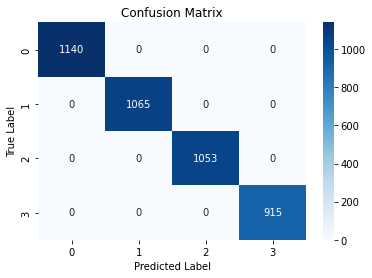

In [38]:
evaluate_classification_model(rf_clf2,X_trainn,y_trainn)

Accuracy: 0.8777857656362329
Precision: 0.8775128333154305
Recall: 0.8777857656362329
F1-score: 0.877240128854196


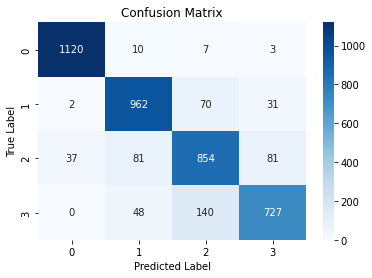

In [39]:
evaluate_classification_model(clf2,X_trainn,y_trainn)

Accuracy: 0.8660436137071651
Precision: 0.8671531772578633
Recall: 0.8660436137071651
F1-score: 0.8656424669481956


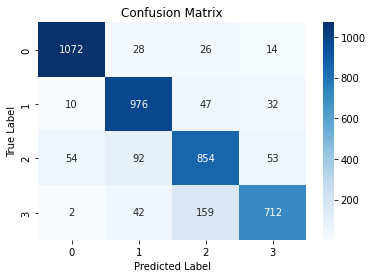

In [40]:
evaluate_classification_model(knn2,X_trainn,y_trainn)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


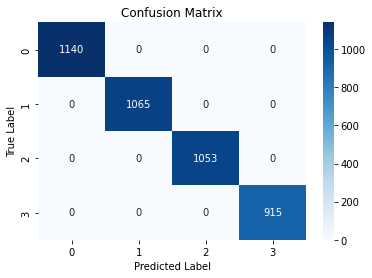

In [41]:
evaluate_classification_model(xgb2,X_trainn,y_trainn)